# Import required libraries

In [247]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Read image

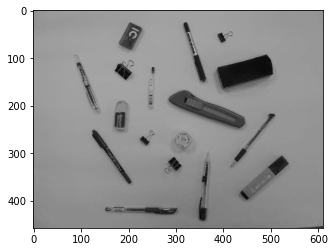

In [248]:
path = "././input/set2/"

current_image = cv.imread(path + "1.jpg", 0)

plt.imshow(current_image, cmap='gray')

# Increase contrast

In [249]:
def adjust_image_gamma(image, gamma=1.0):
    image = np.power(image, gamma)
    max_val = np.max(image.ravel())
    image = image / max_val * 255
    image = image.astype(np.uint8)
    return image


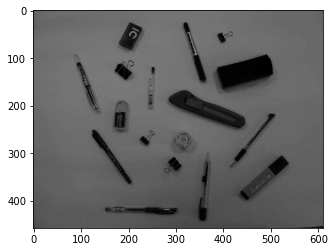

In [250]:
current_image = adjust_image_gamma(current_image, 1.7)
plt.imshow(current_image, cmap='gray')

# Gaussian blur

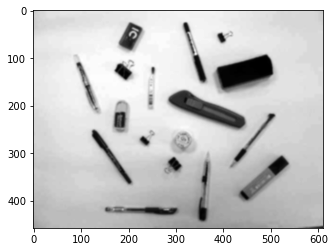

In [251]:
blur = cv.GaussianBlur(current_image, (7, 7), 0)
plt.imshow(blur, cmap='gray')

# Apply adaptive thresholding using the mean threshold method

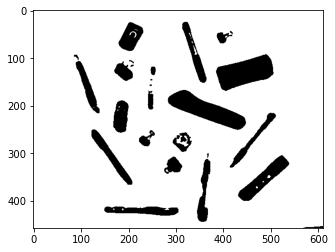

In [252]:
output_adapthresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 201, 10)
plt.imshow(output_adapthresh, cmap='gray')

# Fourier transform

In [253]:
# dft = cv.dft(np.float32(blur),flags = cv.DFT_COMPLEX_OUTPUT)
# dft_shift = np.fft.fftshift(dft)
#
# rows, cols = current_image.shape
# crow,ccol = int(rows/2) , int(cols/2)
#
# mask = np.zeros((rows,cols,2),np.uint8)
# mask[crow-30:crow+30, ccol-30:ccol+30] = 1
#
# fshift = dft_shift*mask
# f_ishift = np.fft.ifftshift(fshift)
# img_back = cv.idft(f_ishift)
# img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
#
# plt.imshow(img_back, cmap='gray')

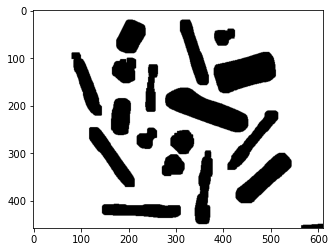

In [254]:
size = 11
kernel = np.ones((size, size), np.uint8)
output_erosion = cv.erode(output_adapthresh, kernel)
plt.imshow(output_erosion, cmap='gray')

# Add counting number to each contour function

In [255]:
def draw_contour(image, c, i):
    # compute the center of the contour area and draw a circle
    # representing the center
    m = cv.moments(c)

    if m["m00"] != 0:
        c_x = int(m["m10"] / m["m00"])
        c_y = int(m["m01"] / m["m00"])
    else:
        c_x = 0
        c_y = 0

    # draw the countour number on the image
    cv.putText(image, "#{}".format(i + 1), (c_x - 20, c_y), cv.FONT_HERSHEY_SIMPLEX,
               1, (255, 255, 255), 1)
    # return the image with the contour number drawn on it
    return image

# Draw contours

Number of detected contours 18


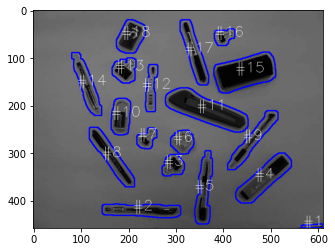

In [256]:
contours, _ = cv.findContours(~output_erosion, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
output_contour = cv.cvtColor(current_image, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)

for (i, c) in enumerate(contours):
    orig = draw_contour(output_contour, c, i)

print("Number of detected contours", len(contours))
plt.imshow(output_contour, cmap='gray')